# IMPORTAZIONE DEI DATI E PROCESSAMENTO

In [1]:
# Setup
# Visualizziamo l'output completo in Jupyter, non solo l'ultimo risultato
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from warnings import simplefilter

# Ignoriamo tutti gli avvisi futuri
simplefilter(action="ignore", category=FutureWarning)

In [2]:
import pandas as pd 
import numpy as np 
film=pd.read_csv("movies_metadata.csv",low_memory=False)

In [3]:
film.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0



#### Il data set dei film presenta le seguenti colonne:

* Budget: il budget con cui è stato realizzato il film,

* Generi: Il genere del film (Azione, Commedia, Thriller ecc.),

* Homepage: Un link che reindirizza alla home page del film,

* ID: questo è il movie_id,

* Parole chiave: le parole chiave o i tag relativi ai film,

* La lingua originale: la lingua in cui è stato realizzato il film,

* Il titolo originale: il titolo del film prima della traduzione o dell'adattamento,

* Panoramica: una breve descrizione del film,

* Popolarità: una quantità numerica che specifica la popolarità del film,

* La casa di produzione del film,

* Il paese in cui è stato prodotto,

* La data in cui è stato rilasciato,

* Gli incassi: che fruttato il film in tutto il mondo,

* Durata del film: il tempo di esecuzione del filmato in minuti,

* Lo stato di errore: "Rilasciato" o "Rumored",

* Tagline: tagline del film,

* Titolo: titolo del film,

* Valutazioni medie ricevute dai film,

* Il conteggio dei voti ricevuti.

# FILTRO DEMOGRAFICO

Prima di iniziare a implementare tale sistema dobbiamo prima definire:

* #### Una metrica per il film,

* #### Il calcolo grazie al quale assegniamo un punteggio a un film, inoltre bisogna identificare e segnare il film più votato dagli utenti.

Quindi è necessario elaborare una valutazione ponderata che tenga conto della valutazione media e del numero di voti accumulati. Un tale sistema farà in modo che un film con un punteggio di 9 dato da 100.000 elettori, ottenga un punteggio (molto) più alto di un film con lo stesso punteggio ma dato da poche centinaia di elettori. La formula di valutazione ponderata come metrica / punteggi è la seguente:

>#### Weighted Rating(WR)=(v/(v+m)∙R)+(m/(v+m)∙C)

Dove:

>>* v è il numero di voti per il film,

>>* m sono i voti minimi richiesti per essere inseriti nella tabella,

>>* R è la valutazione media del film,

>>* C è il voto medio in tutta la relazione,

Abbiamo già i valori per v (vote_count) e R (vote_average) per ogni film nel set di dati; grazie a ciò è possibile calcolare direttamente C nel modo seguente


In [4]:
C = film["vote_average"].mean()
print(C)

5.618207215133889


Dall'output di cui sopra, si può osservare che la valutazione media di un film su IMDB è di circa 5,6 su una scala di 10.
Il passo successivo è quello di determinare un valore appropriato per m, cioè il voto minimo da avere per essere inserito nel grafico. Il cutoff lo impostiamo sul 0.9, il che significa che un film per risultare nel grafico, deve avere più voti di almeno il 90% dei film della lista.

In [5]:
m= film["vote_count"].quantile(0.9)
print(m)

160.0


Dato che ora abbiamo la m possiamo semplicemente usare una condizione maggiore o uguale a 160 per filtrare i film.
Il prossimo passo è quello di utilizzare la funzione .copy(),  assicurardoci cosi che il nuovo DataFrame che andremmo a creare sia indipendente dal DataFrame originale. In altre parole, qualsiasi modifica apportata al nuovo DataFrame non influirà sul frame dei dati originali.

In [6]:
nuovo_film = film.copy().loc[film["vote_count"] >= m]
nuovo_film.shape

(4555, 24)

In [7]:
# ora dimostriamo quanti film di nuovo_film sulla totalità dei film rispettano la condizione che abbiamo prima posto
film.shape

(45466, 24)

> è chiaro che ci sono circa il 10% dei film (4555) con un conteggio dei voti superiore a 160, di conseguenza sono qualificati per essere collocati in tale lista.
Ora calcoleremo la valutazione ponderata per ogni film qualificato. Per fare ciò:

* #### Definiamo una funzione weighted_rating(),

* #### Dal momento che abbiamo già calcolato m e C li useremo come argomento della funzione,

* #### Selezioneremo le colonne vote_count(v) e vote_average(R) dal nuovo data frame (nuovo_film),

* #### Infine, procederemmo calcolando la media ponderata e dandone il risultato.

In [8]:
# Funzione che calcola la valutazione ponderata di ogni filmato
def weighted_rating(x, m=m, C=C):
    v = x["vote_count"]
    R = x["vote_average"]
    # Calcolo basato sulla formula IMDB
    return (v/(v+m) * R) + (m/(m+v) * C)

In [9]:
# Definiamo una nuova funzione "score" (punteggio) e calcoliamo il valore con `weighted_rating()`
nuovo_film["score"] = nuovo_film.apply(weighted_rating, axis=1)

> Infine, ordiniamo il DataFrame in ordine decrescente in base alla colonna delle caratteristiche (score) e otteniamo come output: 

* #### Il titolo, 

* #### Il conteggio dei voti,

* #### La media dei voti, 

* #### La valutazione ponderata (punteggio) dei primi 10 film.

In [10]:
# Ordiniamo i film in base al punteggio calcolato precedentemente
nuovo_film = nuovo_film.sort_values("score", ascending=False)

# Stampiamo (print) i primi 10 film
nuovo_film[["title", "vote_count", "vote_average", "score"]].head(10)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445869
834,The Godfather,6024.0,8.5,8.425439
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453
12481,The Dark Knight,12269.0,8.3,8.265477
2843,Fight Club,9678.0,8.3,8.256385
292,Pulp Fiction,8670.0,8.3,8.251406
522,Schindler's List,4436.0,8.3,8.206639
23673,Whiplash,4376.0,8.3,8.205404
5481,Spirited Away,3968.0,8.3,8.196055
2211,Life Is Beautiful,3643.0,8.3,8.187171


<Figure size 1080x576 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5, 0, 'Popolarità')

Text(0.5, 1.0, 'Film popolari')

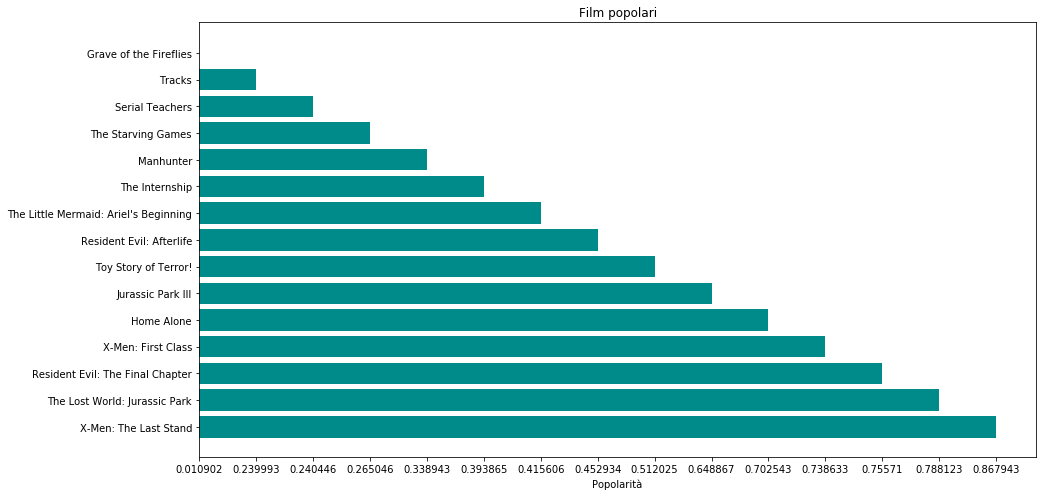

In [11]:
# plotiamo i film in base alla loro popolarità
popolarità= nuovo_film.sort_values("popularity", ascending=True)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.barh(popolarità["title"].head(15),popolarità["popularity"].head(15), align="center",
        color="darkcyan")
plt.gca().invert_yaxis()
plt.xlabel("Popolarità")
plt.title("Film popolari")

# FILTRO BASATO SUL CONTENUTO 

#### Raccomandatore basato sulla descrizione della trama

In questa sezione creeremo un sistema che consiglia film simili a un film in particolare; ad es. il contenuto del film (panoramica, cast, troupe, parola chiave, slogan ecc) viene utilizzato per trovare la sua somiglianza con altri film. Per ottenere ciò, calcoleremo i punteggi di somiglianza (cosine) a coppie per tutti i film in base alle descrizioni della trama e consiglieremo i film che hanno più probabilità di essere simili.

La descrizione del grafico è fornita dalla funzionalità overview, questa si trova allocata all’interno del set di dati. Esaminiamo le trame di alcuni film

In [12]:
# Stampiamo la panoramica della trama dei primi 7 film
film["overview"].head(7)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
5    Obsessive master thief, Neil McCauley leads a ...
6    An ugly duckling having undergone a remarkable...
Name: overview, dtype: object

Il problema in questione è un problema di elaborazione del linguaggio naturale.  Per dirla semplicemente, non è possibile calcolare la somiglianza tra due panoramiche qualsiasi nelle loro forme grezze. Per fare ciò, è necessario calcolare i vettori di parole di ogni panoramica o documento.

I vettori di parole sono rappresentazioni vettorializzate di parole in un documento. I vettori portano con sé un significato semantico. Ad esempio, uomo e re avranno rappresentazioni vettoriali vicine l'una all'altra mentre uomo e donna avranno rappresentazioni lontane l'una dall'altra.

Ora calcoleremo i vettori Term Frequency-Inverse Document Frequency (TF-IDF) per ogni documento. Cosi facendo otterremo una matrice in cui ogni colonna rappresenta una parola nel vocabolario generale (tutte le parole che compaiono in almeno un documento), e ogni colonna rappresenta un film.

Il punteggio TF-IDF è la frequenza con cui una parola ricorre in un documento, ridotta in base al numero di documenti in cui appare. Questo viene fatto per ridurre l'importanza delle parole che riappagliono frequentemente nelle panoramiche della trama e, quindi, il loro significato nel calcolo del punteggio di somiglianza finale.

> Fortunatamente, la libreria scikit-learn offre la funzione TfIdfVectorizer che produce la matrice TF-IDF in un paio di righe. Dunque queste sono le operazioni che ora ci accingiamo a svolgere:

* #### Importeremo il modulo Tfidf usando scikit-learn,

* #### Rimuoveremo le parole chiave come "la", "una", ecc. Poiché non forniscono informazioni utili sull'argomento,

* #### Sostituiremo i valori non numerici con una stringa vuota,

* #### Costruiremo la matrice TF-IDF sui dati.


In [13]:
# Importiamo TfIdfVectorizer da scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Definiamo un vettore di oggetti  TF-IDF . Rimuoviamo tutte le parole inglesi non significative come as 'the', 'a'
tf_idf = TfidfVectorizer(stop_words="english")

# Sostituiamo i NaN con una stringa vuota
film["overview"] = film["overview"].fillna("")

# Costruiamo la matrice TF-IDF utilizzando i dati trasformati
matrice_tfidf = tf_idf.fit_transform(film["overview"])

# Vediamo l'output della matrice tfidf
matrice_tfidf.shape

(45466, 75827)

75.827 parole diverse sono state usate per descrivere i 45.466 film del set di dati.

Con questa matrice, ora possiamo calcolare un punteggio di somiglianza. In questo caso, utilizziamo la cosine similarity per calcolare una quantità numerica che denota la somiglianza tra due film. In questo particolare caso utilizziamo la cosine similarity perché è indipendente dalla magnitudine ed è relativamente facile e veloce da calcolare (specialmente se utilizzato insieme ai punteggi TF-IDF).

Siccome abbiamo adoperato il vettorizzatore TF-IDF, il calcolo del prodotto scalare tra ogni vettore ci darà direttamente la cosine similarity. Dunque, utilizzeremo la funzione sklearn's linear_kernel() invece di cosine_similarities() in quanto è più veloce di quest’ultima.


In [14]:
# Importiamo linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Calcoliamo la matrice della cosine similarity 
cosine_sim = linear_kernel(matrice_tfidf, matrice_tfidf)

In [15]:
# Ora diamo dismostrazione di quanti elementi ha la matrice di similarità ma sopratutto di come sia stata creata
cosine_sim.shape
cosine_sim[1]

(45466, 45466)

array([0.01504121, 1.        , 0.04681953, ..., 0.        , 0.02198641,
       0.00929411])

Procediamo predisponendo una funzione che accetta in input il titolo di un film e genera in output un elenco dei 15 film più simili. 

In primo luogo, effettueremo una mappatura inversa dei titoli dei film e degli indici del DataFrame. In altre parole, creeremo un meccanismo per identificare l'indice di un film nel tuo DataFrame (film), dato il suo titolo.

In [16]:
# Costruiamo una mappa inversa degli indici e titoli dei film
indici = pd.Series(film.index, index=film["title"]).drop_duplicates()

In [17]:
# Diamo dimostrazione di come sono stati creati gli indici visualizzandone i primi 5
indici[:5]

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64

>  Per definire la funzione di raccomandazione, questi sono i passaggi che eseguiremo:

* #### Otterremo l'indice del film dato il suo titolo,

* #### Otterremo l'elenco dei punteggi della cosine similarity per un film in particolare fra tutti i film. L’elenco così ottenuto, lo convertiremo in un elenco di tuple in cui il primo elemento è la sua posizione e il secondo è il punteggio di somiglianza,

* #### Ordineremo l'elenco di tuple sopra menzionato in base ai punteggi di somiglianza (cioè il secondo elemento),

* #### Otterremo i primi 15 elementi dell’elenco delle tuple ordinate. Possiamo anche ignorare il primo elemento in quanto si riferisce a se stesso (il filmato più simile a un particolare filmato è esso stesso),

* #### Restituiremo i titoli corrispondenti agli indici degli elementi superiori.

In [18]:
# Questa è la funzione che prende come input il titolo del film e restituisce in output dei film simili
def get_recommendations(title, cosine_sim=cosine_sim):
    # Otteniamo l'indice del film che che corrisponde al titolo scelto
    ind = indici[title]

    # Otteniamo i punteggi di  pairwsie similarity di tutti i film rispetto al film da noi selezionato
    punteggio_sim = list(enumerate(cosine_sim[ind]))

    # Ordiniamo i film in base ai punteggi di somiglianza
    punteggio_sim = sorted(punteggio_sim, key=lambda x: x[1], reverse=True)

    # Otteniamo i punteggi dei 15 film più simili
    punteggio_sim = punteggio_sim[1:16]

    # Otteniamo gli indici dei film
    indici_film = [i[0] for i in punteggio_sim]

    # Restituiamo i primi 15 film più simili
    return film["title"].iloc[indici_film]

In [19]:
# Facciamo un test per vedere se il recommender funziona, la prova la eseguiamo con il film "The Dark Knight Rises"
get_recommendations("The Dark Knight Rises") 

12481                                      The Dark Knight
150                                         Batman Forever
1328                                        Batman Returns
15511                           Batman: Under the Red Hood
585                                                 Batman
21194    Batman Unmasked: The Psychology of the Dark Kn...
9230                    Batman Beyond: Return of the Joker
18035                                     Batman: Year One
19792              Batman: The Dark Knight Returns, Part 1
3095                          Batman: Mask of the Phantasm
35983                                    Batman: Bad Blood
20232              Batman: The Dark Knight Returns, Part 2
40974    LEGO DC Comics Super Heroes: Batman: Be-Leaguered
10122                                        Batman Begins
41982    Batman Beyond Darwyn Cooke's Batman 75th Anniv...
Name: title, dtype: object

In [20]:
# Facciamo un test per vedere se il recommender funziona, la prova la eseguiamo con il film "Toy Story"
get_recommendations("Toy Story") 

15348                                     Toy Story 3
2997                                      Toy Story 2
10301                          The 40 Year Old Virgin
24523                                       Small Fry
23843                     Andy Hardy's Blonde Trouble
29202                                      Hot Splash
43427                Andy Kaufman Plays Carnegie Hall
38476    Superstar: The Life and Times of Andy Warhol
42721    Andy Peters: Exclamation Mark Question Point
8327                                        The Champ
27206                      Life Begins for Andy Hardy
1071                            Rebel Without a Cause
36094                            Welcome to Happiness
40261                                   Wabash Avenue
1932                                        Condorman
Name: title, dtype: object

In [21]:
# Facciamo un test per vedere se il recommender funziona, la prova la eseguiamo con il film "Jumanji"
get_recommendations("Jumanji") 

21633                   Table No. 21
45253                           Quiz
41573                   Snowed Under
35509                       The Mend
44376              Liar Game: Reborn
17223                 The Dark Angel
8801                         Quintet
6166                       Brainscan
30981                   Turkey Shoot
9503                       Word Wars
39938                      Beta Test
13601    The Mindscape of Alan Moore
13711                     Rhinoceros
16843                         DeVour
8079                         Masques
Name: title, dtype: object

In [22]:
# Facciamo un test per vedere se il recommender funziona, la prova la eseguiamo con il film "Balto"
get_recommendations("Balto")

18684     The Dark Side of the Sun
34039          Three Little Wolves
20068    Spring Break Shark Attack
17785                         I Am
37935                Klondike Kate
9748             The Four Feathers
25250          Sport, Sport, Sport
14421              The Fourth Kind
288                       Outbreak
3899            The House of Mirth
37236                  Wolf Summer
27711             Two Years at Sea
14031                     Bandslam
8079                       Masques
7541                A Better Place
Name: title, dtype: object

In [23]:
# Facciamo un test per vedere se il recommender funziona, la prova la eseguiamo con il film "Dumb and Dumber"
get_recommendations("Dumb and Dumber")

13308                                       Aspen
5175                  Three Men and a Little Lady
184                                    Party Girl
23269                           Broadway Serenade
31883                          The Lazarus Papers
30386                             Fiasco in Milan
16684                            When Ladies Meet
17300                            When Ladies Meet
32284                              Mary and Rhoda
21081                                The Neighbor
42966                         A Date for Mad Mary
20093                             That Hagen Girl
9321     Balzac and the Little Chinese Seamstress
7481                             Straight to Hell
21449                                    Madhouse
Name: title, dtype: object

In [24]:
# Facciamo un test per vedere se il recommender funziona, la prova la eseguiamo con il film "The Godfather"
get_recommendations("The Godfather")

1178                                The Godfather: Part II
44030                     The Godfather Trilogy: 1972-1990
1914                               The Godfather: Part III
23126                                           Blood Ties
11297                                     Household Saints
34717                                    Start Liquidation
10821                                             Election
38030                             A Mother Should Be Loved
17729                                    Short Sharp Shock
26293                                   Beck 28 - Familjen
30787                                    The Sign of Venus
8653                                          Violent City
30169    Paolo Barca, maestro elementare, praticamente ...
13177                                         I Am the Law
26660                                             Suddenly
Name: title, dtype: object

Visionando queste raccomandazioni si capisce una cosa, sebbene il sistema ha fatto un buon lavoro nel trovare film con descrizioni di trama simili, la qualità dei consigli non è eccezionale. "The Dark Knight Rises" restituisce tutti i film di Batman, ma probabilmente le persone a cui è piaciuto quel film sono più inclini a vedere altri film di Christopher Nolan. Questo è un qualcosa che non può essere carpito dal sistema così com’è attualmente.

# RICONOSCIMENTI, GENERI E SUGGERIMENTI BASATI SU PAROLE CHIAVE

La qualità del recommender system aumenta se si usano dei metadati migliori. Questo è esattamente ciò che ci accingiamo a fare ora. Costruiremo un recommender system basato sui seguenti metadati: 

* I 3 attori principali,

* Il regista,

* I generi correlati,

* Le parole chiave della trama del film.

C'è da notare che le parole chiave,  non sono disponibili nel set di dati corrente, quindi ora li caricheremo e li uniremo nel DataFrame principale film.

In [25]:
# Carichiamo keywords e credits
crediti = pd.read_csv("credits.csv")
parole_chiave = pd.read_csv("keywords.csv")

# Rimuoviamo le righe con dei cattivi ID
film = film.drop([19730, 29503, 35587])

# Convertiamo gli ID in int. facciamo ciò per riunire tutti i dati in un dataframe
parole_chiave["id"] = parole_chiave["id"].astype("int")
crediti["id"] = crediti["id"].astype("int")
film["id"] = film["id"].astype("int")

# Uniamo le parole chiave e i crediti nel dataframe principale (cioè film)
film = film.merge(crediti, on="id")
film = film.merge(parole_chiave, on="id")

In [26]:
# Stampiamo i primi tre film dei metadati appena uniti
film.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


Dalle nuove caratteristiche, cast, troupe e parole chiave, dobbiamo estrarre i tre attori più importanti, il regista e le parole chiave associate a quel film.
Innanzitutto convertiamo i dati in modo da poterli utilizzare, in quanto allo stato attuale sono presenti sotto forma di elenchi “stringati”.


In [27]:
# Analizziamo le caratteristiche stringificate negli oggetti python corrispondenti
from ast import literal_eval

caratteristiche = ["cast", "crew", "keywords", "genres"]
for feature in caratteristiche:
    film[feature] = film[feature].apply(literal_eval)

Adoperiamo la funzione get_director() del pacchetto NumPy (lo abbiamo richiamato nelle prime righe di codice), per ottenere il nome del regista dal film della troupe. Se il regista non è elencato, torna a NaN.

In [28]:
# Prendiamo il nome del regista dalla funzione dell'equip. Se il direttore non è presente nell'elenco,restituiremo NaN
def get_director(x):
    for i in x:
        if i["job"] == "Director":
            return i["name"]
    return np.nan

In [29]:
# Restituiamo l'elenco dei primi 3 elementi o dell'intero elenco.l'elenco si riferisce al cast, le parole chiave e ai generi
def get_list(x):
    if isinstance(x, list):
        nomi = [i["name"] for i in x]
    # Controlliamo se esistono più di 3 elementi. In caso affermativo, restituiamo solo i primi tre. In caso contrario, l'intero elenco.
        if len(nomi) > 3:
            nomi = nomi[:3]
        return nomi

    # Restituiamo un elenco vuoto in caso di dati mancanti
    return []

In [30]:
# Definiamo le nuove caratteristiche del regista, del cast, dei generi e delle parole chiave che ora sono in un formato adatto
film["director"] = film["crew"].apply(get_director)

caratteristiche = ["cast", "keywords", "genres"]
for feature in caratteristiche:
    film[feature] = film[feature].apply(get_list)

In [31]:
# Stampiamo le nuove caratteristiche dei primi e 5 film
film[["title", "cast", "director", "keywords", "genres"]].head(5)

,title,cast,director,keywords,genres
0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy]","[Animation, Comedy, Family]"
1,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,"[fishing, best friend, duringcreditsstinger]","[Romance, Comedy]"
3,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devine]",Forest Whitaker,"[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]"
4,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short]",Charles Shyer,"[baby, midlife crisis, confidence]",[Comedy]


Il passaggio successivo da eseguire consiste nel convertire i nomi e le istanze delle parole chiave in lettere minuscole e rimuovere tutti gli spazi tra di esse.

La rimozione degli spazi tra le parole è un importante passaggio di pre-elaborazione. È fatto in modo che il vettorizzatore non conti il Johnny di "Johnny Depp" e "Johnny Galecki" come lo stesso elemento. Dopo questa fase di elaborazione, i suddetti attori saranno rappresentati come "johnnydepp" e "johnnygalecki" e saranno visti come elementi differenti dal nostro vettorizzatore.

In [32]:
# La funzione che utilizziamo per convertire tutte le stringhe in lettere minuscole e rimuovere gli spazzi dai nomi è:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        # Verifichiamo se il direttore esiste. In caso contrario, restituiamo una stringa vuota
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return " "

In [33]:
# Applichiamo la funzione clean_data alle nostre caratteristiche
caratteristiche = ["cast", "keywords", "director", "genres"]

for feature in caratteristiche:
    film[feature] = film[feature].apply(clean_data)

Ora siamo in grado di creare  una "zuppa di metadati", codesta è una stringa che contiene tutti i metadati che vogliamo dare al nostro vettorizzatore (nel nostro caso: attori, regista e parole chiave).

Utilizzeremo la funzione create_soup per unire tutte le colonne richieste con uno spazio. Questa è la fase di pre-elaborazione finale e l'output di questa funzione verrà inserito nel modello vettoriale di parole.

In [34]:
def create_soup(x):
    return " ".join(x["keywords"]) + " " + " ".join(x["cast"]) + " " + x["director"] + " " + " ".join(x["genres"])

# Creiamo una nuova zuppa di funzionalità
film["soup"] = film.apply(create_soup, axis=1)

# Effettuiamo un test per vedere se la zuppa è stata correttamente creata
film[["soup"]].head(5)

,soup
0,jealousy toy boy tomhanks timallen donrickles ...
1,boardgame disappearance basedonchildren'sbook ...
2,fishing bestfriend duringcreditsstinger walter...
3,basedonnovel interracialrelationship singlemot...
4,baby midlifecrisis confidence stevemartin dian...


I passaggi successivi, sono gli stessi che abbiamo fatto per plottare il description-based recommendation system. Una differenza fondamentale è che ora useremo CountVectorizer() invece di TF-IDF (il componente IDF inverse document frequency, è presente solo nella seconda funzione e non anche nella prima).

Useremo CountVectorizer(), perché non possiamo ignorare l’eventualità in cui l'attore / regista ha recitato o diretto in più film (ecco perché non ha molto senso ridimensionarli con la funzione TF-IDF).

In [35]:
# Importiamo il CountVectorizer e creiamo la matrice per il conteggio
from sklearn.feature_extraction.text import CountVectorizer

conteggio = CountVectorizer(stop_words="english")
matrice_conteggio = conteggio.fit_transform(film["soup"])
matrice_conteggio.shape

(46628, 73881)

Dall'output ottenuto, possiamo vedere come ci siano 73.881 vocabolari nei metadati che gli abbiamo fornito.

Ora utilizziamo la funzione cosine_similarity per misurare la distanza tra gli inserti.

In [36]:
# Calcoliamo la cosine similarity in base alla matrice del conteggio
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(matrice_conteggio, matrice_conteggio)

In [37]:
# Reimpostiamo l'indice del nostro dataframe e creiamo il mapping inverso come abbiamo già fatto in precedenza
film = film.reset_index()
indici = pd.Series(film.index, index=film["title"])

Ora possimao riutilizzare la funzione get_recommendations(), utilizzando però questa volta come secondo argomento la nuova matrice ottenuta grazie alla cosine_sim2

In [38]:
get_recommendations("The Dark Knight Rises", cosine_sim2)

12589           The Dark Knight
10210             Batman Begins
9311                     Shiner
9874            Amongst Friends
7772                   Mitchell
516           Romeo Is Bleeding
11463              The Prestige
24090                 Quicksand
25038                  Deadfall
41063                      Sara
43848     Lure: Teen Fight Club
10853            Helter Skelter
18940                 Last Exit
34488                      Rege
35802    Manuscripts Don't Burn
Name: title, dtype: object

In [39]:
get_recommendations("Toy Story", cosine_sim2)

3024                                           Toy Story 2
15519                                          Toy Story 3
29198                                      Superstar Goofy
26001                           Toy Story That Time Forgot
22126                                 Toy Story of Terror!
3336                                     Creature Comforts
25999                                      Partysaurus Rex
27606                                                Anina
43071                        Dexter's Laboratory: Ego Trip
28005                                        Radiopiratene
29607                                          Cheburashka
40904                   VeggieTales: Josh and the Big Wall
40913    VeggieTales: Minnesota Cuke and the Search for...
41371                                              Uncle P
15734                     The Bugs Bunny/Road Runner Movie
Name: title, dtype: object

In [40]:
get_recommendations("Jumanji", cosine_sim2)

14455                       Where the Wild Things Are
552                                    The Pagemaster
26717                                  Mostly Ghostly
38713                          Jack and the Beanstalk
24871               Tinker Bell and the Lost Treasure
30651    Mostly Ghostly: Have You Met My Ghoulfriend?
41598       Mostly Ghostly 3: One Night in Doom House
42041                                  You Are Umasou
13109                                   City of Ember
14780          Playmobil: The Secret of Pirate Island
16613                       Cirque du Soleil: Varekai
18480                  G.I. Joe: The Revenge of Cobra
30667                 Zenon: Girl of the 21st Century
32498                          Puff, the Magic Dragon
38236                      Kingdom of Crooked Mirrors
Name: title, dtype: object

In [41]:
get_recommendations("Balto", cosine_sim2)

24749                                           Tom Sawyer
38374                                     The King's Beard
29607                                          Cheburashka
40904                   VeggieTales: Josh and the Big Wall
40913    VeggieTales: Minnesota Cuke and the Search for...
40916    VeggieTales: Sheerluck Holmes and the Golden R...
3976                                       A Monkey's Tale
24528                                     No Time for Nuts
32376                Pokémon: Giratina and the Sky Warrior
40915                VeggieTales: LarryBoy & The Bad Apple
16971                                      Mars Needs Moms
30892                      Blank: A Vinylmation Love Story
42520                                   Junior and Karlson
10409                                              Valiant
15209             Spiderman: The Ultimate Villain Showdown
Name: title, dtype: object

In [42]:
get_recommendations("Dumb and Dumber", cosine_sim2)

6657                                    Super Sucker
28676                      Jim Carrey: Unnatural Act
25140                             Dumb and Dumber To
5715                        Escanaba in da Moonlight
22574                                      The Guide
41590     The First Annual 'On Cinema' Oscar Special
43758    The Fourth Annual 'On Cinema' Oscar Special
44914                                   World Cinema
46134                               Puolin ja toisin
1577                              A Smile Like Yours
3770                                    All the Rage
27789             Archie To Riverdale and Back Again
34801                                  Just Desserts
40045                                     So Is This
4462                              Sweet Hearts Dance
Name: title, dtype: object

In [43]:
get_recommendations("The Godfather", cosine_sim2)

1934            The Godfather: Part III
1199             The Godfather: Part II
15609                   The Rain People
18940                         Last Exit
34488                              Rege
35802            Manuscripts Don't Burn
35803            Manuscripts Don't Burn
8001     The Night of the Following Day
18261                 The Son of No One
28683            In the Name of the Law
39193                 The Good Neighbor
7772                           Mitchell
23540               Hide in Plain Sight
1186                     Apocalypse Now
1648                   Ill Gotten Gains
Name: title, dtype: object

> Come possiamo osservare, il recommender è riuscito ad acquisire più informazioni grazie all’utilizzo di più metadati, di conseguenza sono stati dati dei consigli migliori. Ci sono, numerosi modi per migliorare il nostro recommender, alcuni esempi possono essere quelli di:

>>* Introdurre un filtro di popolarità,

>>* Includere altri membri della troupe, come ad esempio sceneggiatori e produttori,

>>* Predisporre un peso crescente del regista.

# FILTRO COLLABORATIVO

In questa sezione verrà utilizzata una tecnica denominata Collaborative Filtering per fornire delle raccomandazioni a chi guarda i film. Fondamentalmente questa tecnica si dirama in due tipologie:

* _Filtri basati sull'utente_: questi sistemi consigliano prodotti a un utente sulla base dei prodotti che sono stati apprezzati da utenti simili all’utente scelto. Per misurare la somiglianza fra due utenti possiamo utilizzare la correlazione di pearson o la cosine similarity.


* _Filtri basati sugli elementi_: invece di misurare la somiglianza tra gli utenti, consiglia gli elementi in base alla loro somiglianza con quelli valutati dall'utente che abbiamo scelto. Anche qui, la somiglianza può essere calcolata con la correlazione di Pearson o la cosine similarity. La differenza principale è che, con il filtraggio basato sugli elementi, riempiamo lo spazio vuoto verticalmente. 

In [44]:
from surprise import (Reader, Dataset, SVD)
from surprise.model_selection import cross_validate
lettore = Reader()
# Per velocizzare i calcoli useremo il dataset ratings in versione ridotta cioè ratings_small
voti = pd.read_csv("ratings_small.csv")
voti.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [45]:
# Carichiamo il set di dati che andremo ad utilizare
data = Dataset.load_from_df(voti[["userId", "movieId", "rating"]], lettore)

In [46]:
# Adoperiamo l'algoritmo SVD
svd = SVD()
# Eseguiamo 5 volte cross_validate (la convalida incrociata) e stampiamo i risultati.
cross_validate(svd, data, measures=["RMSE", "MAE"],cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8946  0.8894  0.8946  0.9037  0.8998  0.8964  0.0049  
MAE (testset)     0.6881  0.6862  0.6885  0.6939  0.6921  0.6898  0.0028  
Fit time          3.48    3.46    3.48    3.51    3.45    3.48    0.02    
Test time         0.12    0.10    0.10    0.10    0.10    0.10    0.01    


{'test_rmse': array([0.89456188, 0.88940633, 0.89464703, 0.90365865, 0.89978137]),
 'test_mae': array([0.68809372, 0.68617336, 0.68852818, 0.69389397, 0.6920678 ]),
 'fit_time': (3.4815237522125244,
  3.457468032836914,
  3.4814677238464355,
  3.511371612548828,
  3.453059673309326),
 'test_time': (0.11769270896911621,
  0.09674692153930664,
  0.09674715995788574,
  0.09973907470703125,
  0.09725069999694824)}

Come possiamo osservare dal valore _Mean RMSE_, abbiamo ottenuto un errore quadratico medio di 0.89. A questo punto è necessario eseguire il training set dei dati per arrivare a fornire delle stime.

In [47]:
train = data.build_full_trainset()
svd.fit(train)

In [48]:
# Vedimao quali sono i voti per il terzo userId
voti[voti["userId"] == 3] 

,userId,movieId,rating,timestamp
96,3,60,3.0,1298861675
97,3,110,4.0,1298922049
98,3,247,3.5,1298861637
99,3,267,3.0,1298861761
100,3,296,4.5,1298862418
101,3,318,5.0,1298862121
102,3,355,2.5,1298861589
103,3,356,5.0,1298862167
104,3,377,2.5,1298923242
105,3,527,3.0,1298862528


In [49]:
svd.predict(3, 250, 3)

Prediction(uid=3, iid=250, r_ui=3, est=3.2787766940283047, details={'was_impossible': False})

>Per il filmato con ID 250, otteniamo una previsione di stimata  di 3.278.Il tutto funziona esclusivamente sulla base dell'ID del film scelto,  grazie a quest'ultimo siamo in grado di prevedere le valutazioni in base a come gli altri utenti hanno a loro volta valutato il film.

# CONCLUSIONE

_Nel qui presente terzo capitolo della trattazione tesisitica proposta, abbiamo creato con successo dei reccomender system   utilizzando approcci di:_ 

* ##### Filtraggio demografici, 

* ##### Basati sul contenuti, 

* ##### Collaborativi.

Tutti i codici, sono stati eseguiti grazie a Jupyter Notebook, un’applicazione web open source che consente di includere testo, video, audio e immagini e offre la possibilità di eseguire codice in diversi linguaggi di programmazione. Di default, fornisce il kernel di Python. Tuttavia supporta altri kernel come Octave, Julia, R, Haskell, Ruby, C / C ++, Fortan, Java, SageMath, Scala, Matlab, Mathematica e LaTeX.

La sua architettura è il principale vantaggio; questa consente di ospitare l’intera installazione di kernel, librerie e strumenti necessari in un server (può anche essere integrato con docker), impedendo così per esempio che ogni membro di un Data Science Team debba configurare tutto il proprio ambiente di lavoro localmente nel proprio computer.Si collegano direttamente dai loro computer all’ambiente server tramite browser e dispongono già di tutte le configurazioni di base necessarie per lavorare.Inoltre tutto il codice sviluppato in un notebook può essere esportato in formati come HTML, LateX, pdf, ReStructuredText e presentazioni.